<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/RawVsJPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install rawpy  ##tells collab that this is a cmd - whatever cmd , just prefix  !
import numpy as np 
import cv2 
import rawpy 
import imageio
from sklearn.linear_model import LinearRegression 
import os 
import math
import matplotlib.pyplot as plt 
import csv

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/RAW/'  #change dir to your project folder


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:

temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1')
images=[]
name_jpg=[]
#loading .dng files 
for name in temp: 
    path = '/content/gdrive/My Drive/RAW/RAW_Batch1/' + str(name)
    if(name.endswith('.dng')):
      images.append(path)
    if(name.endswith('.jpg')):
      name_jpg.append(path)
    
    
# print(images)
# print(name_jpg)
  
# images_rgb=[]
# #converting them into rgb files
# for image in images:
#   read = rawpy.imread(image)
#   images_rgb.append(read.postprocess())
  
# print(len(images_rgb))
# print(images_rgb)
  
images_jpg=[]
for image in name_jpg:
  try:
    read = cv2.imread(image)
    print('read')
    images_jpg.append(read)
  except : 
    print(image)

print(images_jpg)

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
  #f, ax = plt.subplots(2, 1, figsize = (15, 15))
  #ax[0].imshow(imgrgb)
  #ax[1].imshow(sky)
  #ax[2].imshow(building)
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)
  
  
  

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
  return (-1 * ent[0])

In [0]:
trans_rgb=[]
for img in images_rgb: 
  k=transmission(img, retMean= True)
  print(k)
  trans_rgb.append(k)

In [0]:
trans_jpg=[]
for img in images_jpg: 
  k=transmission(img, retMean= True)
  print(k)
  trans_jpg.append(k)

In [81]:
contrast_rgb=[]
for img in images_rgb:
  k=contrast(img)
  print(k)
  contrast_rgb.append(k)

45.68121240753001
44.95451346618938
45.52252869095291
50.56959131733571
67.52135228840412
63.23109901265532
50.84173400378498
68.79381261414704
66.9013147540022
49.59360450548388
50.713775267145905
48.89511284092175
46.63416029432451
45.69138749695882
68.85645712796877
65.46747182975331
50.071916558678595
45.98038323164885
45.20241367068404
48.90107492776658


In [82]:
contrast_jpg=[]
for img in images_jpg:
  k=contrast(img)
  print(k)
  contrast_jpg.append(k)
 

69.86390121401905
70.62709551347122
46.55597919431424
71.92964770898816
47.40682973161219
47.54063660644583
59.00896027914792
47.019046741722434
46.62669394109742
65.96206164884953
70.89863816052709
44.838552360317145
46.01039218732928
68.4928854139249
47.90460978507199
47.854151000707446
46.28224732821827
46.691890014662114


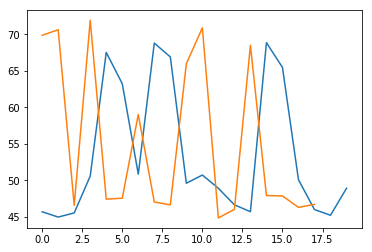

In [89]:
# print(len(contrast_jpg), len(contrast_rgb))
# plt.scatter(range(20), contrast_rgb)
# plt.scatter(range(18), contrast_jpg)

plt.plot(contrast_rgb)
plt.plot(contrast_jpg)

In [75]:
entropy_rgb=[]
for img in images_rgb:
  k=entropy(img)
  entropy_rgb.append(k)
  print(k)

47.18281936645508
46.329341888427734
46.896507263183594
49.262001037597656
49.22060775756836
49.382633209228516
48.68278503417969
49.55583572387695
49.93907165527344
50.31831741333008
48.811241149902344
49.842681884765625
48.24837875366211
47.12194061279297
49.906349182128906
49.7675666809082
50.76554489135742
47.34812927246094
46.57149124145508
49.86069107055664


In [77]:
entropy_jpg=[]
for img in images_jpg:
  k=entropy(img)
  entropy_jpg.append(k)
  print(k)

49.45159149169922
48.230709075927734
32.649417877197266
47.51286697387695
34.916439056396484
37.25502395629883
50.049617767333984
34.35334396362305
32.90004348754883
51.80630874633789
47.83744430541992
42.29751968383789
31.687711715698242
50.57211685180664
38.128597259521484
37.60172653198242
31.85570526123047
33.39839172363281


In [0]:
temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1/')
print(temp)


In [0]:
l= ['RAW_2019_06_12_07_18_25_421.dng', 'RAW_2019_06_12_07_34_46_889.dng', 'RAW_2019_06_12_07_26_27_608.dng', 'RAW_2019_06_12_05_08_06_941.dng', 'RAW_2019_06_11_18_49_32_353.dng', 'RAW_2019_06_11_18_29_32_348.dng', 'RAW_2019_06_12_05_10_25_219.dng', 'RAW_2019_06_11_18_45_29_030.dng', 'RAW_2019_06_11_18_39_46_198.dng', 'RAW_2019_06_12_06_52_06_934.dng', 'RAW_2019_06_12_05_09_41_138.dng', 'RAW_2019_06_12_06_56_46_862.dng', 'RAW_2019_06_12_07_07_37_396.dng', 'RAW_2019_06_12_07_12_14_445.dng', 'RAW_2019_06_11_18_57_32_569.dng', 'RAW_2019_06_11_18_34_35_794.dng', 'RAW_2019_06_12_05_02_38_152.dng', 'RAW_2019_06_12_07_24_26_431.dng', 'RAW_2019_06_12_07_36_27_617.dng', 'RAW_2019_06_12_07_01_27_620.dng']
print(len(l))

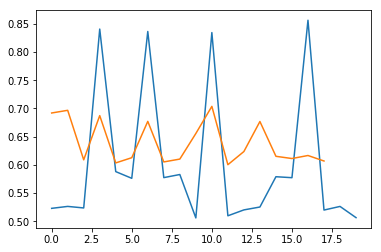

In [53]:
#plt.clabel('Comparison between transmission means from the RAW and their corresponding JPEG images ')
plt.plot( trans_rgb)
plt.plot( trans_jpg)

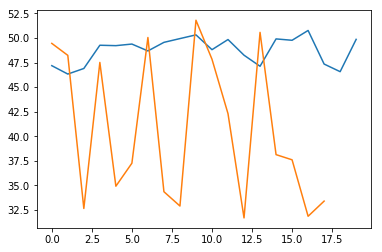

In [79]:
plt.plot( entropy_rgb)
plt.plot( entropy_jpg)

In [93]:
temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1/')
print(temp)

['RAW_2019_06_12_07_18_25_421.dng', 'RAW_2019_06_12_07_34_46_889.dng', 'RAW_2019_06_12_07_26_27_608.dng', 'RAW_2019_06_12_05_08_06_941.dng', 'RAW_2019_06_11_18_49_32_353.dng', 'RAW_2019_06_11_18_29_32_348.dng', 'RAW_2019_06_12_05_10_25_219.dng', 'RAW_2019_06_11_18_45_29_030.dng', 'RAW_2019_06_11_18_39_46_198.dng', 'RAW_2019_06_12_06_52_06_934.dng', 'RAW_2019_06_12_05_09_41_138.dng', 'RAW_2019_06_12_06_56_46_862.dng', 'RAW_2019_06_12_07_07_37_396.dng', 'RAW_2019_06_12_07_12_14_445.dng', 'RAW_2019_06_11_18_57_32_569.dng', 'RAW_2019_06_11_18_34_35_794.dng', 'RAW_2019_06_12_05_02_38_152.dng', 'RAW_2019_06_12_07_24_26_431.dng', 'RAW_2019_06_12_07_36_27_617.dng', 'RAW_2019_06_12_07_01_27_620.dng', 'JPEG_2019_06_11_18_39_46_198.jpg', 'JPEG_2019_06_11_18_45_29_030.jpg', 'JPEG_2019_06_12_07_26_27_608.jpg', 'JPEG_2019_06_11_18_49_32_353.jpg', 'JPEG_2019_06_12_07_07_37_396.jpg', 'JPEG_2019_06_12_07_01_27_620.jpg', 'JPEG_2019_06_15_05_35_34_219.jpg', 'JPEG_2019_06_12_07_12_14_445.jpg', 'JPEG_2019_

In [153]:
temp=[]
with open('/content/gdrive/My Drive/RAW/RAW_Batch1/airveda1.csv', mode ='r') as csv_file: 
      csv_reader=csv.reader(csv_file)
      line_count = 0 
      for row in csv_reader: 
        temp.append(row[0])

temp.pop(0)

stamp=[]
for iter in temp: 
  try: 
    k=iter.split(':')
    stamp.append(str(k[0])+ str(k[1]))
  except: 
    print('ERROR at' + str(iter))

y=[]
for stp in stamp: 
    x=stp.split('-')
    y.append(str(x[0])+str(x[1])+str(x[2]))
final_av=[]
for ctr in y:
  z=ctr.split(' ')
  final_av.append(str(z[0])+str(z[1]))
  
print(len(final_av))

temp  = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1/')

dummy=[]
final_jpeg=[]

for file in temp: 
  if(file.endswith('.jpg')):
    dummy=file.split('_')
    final_jpeg.append(str(dummy[1])+str(dummy[2])+str(dummy[3])+str(dummy[4])+str(dummy[5]))
    
print(len(final_jpeg))

match=[]
for stmp in final_jpeg: 
  for s in final_av: 
      if(s==stmp and s not in match):
        match.append(s)

      
print(match)

6789
18
['201906111839', '201906111845', '201906120726', '201906111849', '201906120707', '201906120701', '201906120712', '201906120724', '201906111829', '201906111857', '201906121910', '201906120736', '201906111834', '201906120652', '201906120656', '201906120734', '201906120718']


In [0]:
dir = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1')